# 9. Sorting, filtering and frequency analysis

In this lecture we demonstrate:
1. how to sort the rows of the table;
2. how to filter out the rows of a table which satisfy some criterion; and
3. how to perform frequency analysis on the rows of a table.

## 9.1. Sorting

Recall that to sort a sequence means to order its members in an increasing (or decreasing) way. To sort the rows of a table means to rearrange the rows so that the values in a particular column are sorted. We shall now show how to quickly sort tables using the _pandas_ library. Let us first load the library:

In [1]:
import pandas as pd

Consider the example we have already analyzed in previous lectures:

In [2]:
students = [["Anne",    "f", 13, 46, 160],
            ["Ben",     "m", 14, 52, 165],
            ["Colin",   "m", 13, 47, 157],
            ["Diana",   "f", 15, 54, 165],
            ["Ethan",   "m", 15, 56, 163],
            ["Fred",    "m", 13, 45, 159],
            ["Gloria",  "f", 14, 49, 161],
            ["Hellen",  "f", 15, 52, 164],
            ["Ian",     "m", 15, 57, 167],
            ["Jane",    "f", 13, 45, 158],
            ["Kate",    "f", 14, 51, 162]]
students_df = pd.DataFrame(students)
students_df.columns=["Name", "Sex", "Age", "Weight", "Height"]
students_ix=students_df.set_index("Name")

The table looks like this:

In [3]:
students_ix

,Sex,Age,Weight,Height
Name,,,,
Anne,f,13,46,160
Ben,m,14,52,165
Colin,m,13,47,157
Diana,f,15,54,165
Ethan,m,15,56,163
Fred,m,13,45,159
Gloria,f,14,49,161
Hellen,f,15,52,164
Ian,m,15,57,167


The function `sort_values` sorts the rows of a table so that the values in a particular column are sorted. The name of the column that we want sorted is sometimes called the _sorting criterion_. We specify the sorting criterion using the option `by` like this:

In [4]:
students_by_height = students_ix.sort_values(by="Height")
students_by_height

,Sex,Age,Weight,Height
Name,,,,
Colin,m,13,47,157
Jane,f,13,45,158
Fred,m,13,45,159
Anne,f,13,46,160
Gloria,f,14,49,161
Kate,f,14,51,162
Ethan,m,15,56,163
Hellen,f,15,52,164
Ben,m,14,52,165


The default _sorting order_ is _ascending_, which means that the rows of the table will be rearranged so that the values in the column "Height" increase. If we wish to sort the table so that the first row contains the highest student we have to invoke the function with an additional option `ascending=False`:

In [5]:
students_by_height = students_ix.sort_values(by="Height", ascending=False)
students_by_height

,Sex,Age,Weight,Height
Name,,,,
Ian,m,15,57,167
Ben,m,14,52,165
Diana,f,15,54,165
Hellen,f,15,52,164
Ethan,m,15,56,163
Kate,f,14,51,162
Gloria,f,14,49,161
Anne,f,13,46,160
Fred,m,13,45,159


Finally, let us visualize the height and the weight of the students in the sorted table (note that the table is sorted by height, but that does not mean that the remaining columns are also sorted):

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(students_by_height.index, students_by_height["Height"], label="Height")
plt.bar(students_by_height.index, students_by_height["Weight"], label="Weight")
plt.title("The height and the weight of students in the group")
plt.legend()
plt.show()
plt.close()

<Figure size 1000x500 with 1 Axes>

## 9.2. Filtering data

Quite often we have to go through a table and single out the rows that satisfy some criterion. For example, if we wish to focus on the data about females only, we can filter out these rows and package them into a new table like this:

    girls = students_ix[students_ix.Sex == "f"]

In [7]:
girls = students_ix[students_ix.Sex == "f"]
girls

,Sex,Age,Weight,Height
Name,,,,
Anne,f,13,46,160
Diana,f,15,54,165
Gloria,f,14,49,161
Hellen,f,15,52,164
Jane,f,13,45,158
Kate,f,14,51,162


This will sigle out students with more than 50 kg:

In [8]:
over_50kg = students_ix[students_ix.Weight > 50]
over_50kg

,Sex,Age,Weight,Height
Name,,,,
Ben,m,14,52,165
Diana,f,15,54,165
Ethan,m,15,56,163
Hellen,f,15,52,164
Ian,m,15,57,167
Kate,f,14,51,162


We can also combine criteria. For example if want to focus on boys with not more than 55 kg, we have to combine two criteria:

    Weight <= 55  and  Sex == "m".

The `pandas` library uses the symbol `&` to combine criteria in cases both have to be satisfied:

In [9]:
boys_55kg = students_ix[(students_ix.Weight <= 55) & (students_ix.Sex == "m")]
boys_55kg

,Sex,Age,Weight,Height
Name,,,,
Ben,m,14,52,165
Colin,m,13,47,157
Fred,m,13,45,159


Let us visualize the height and weight of these boys:

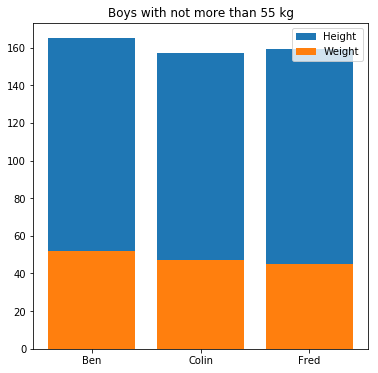

In [10]:
plt.figure(figsize=(6,6))
plt.bar(boys_55kg.index, boys_55kg["Height"], label="Height")
plt.bar(boys_55kg.index, boys_55kg["Weight"], label="Weight")
plt.title("Boys with not more than 55 kg")
plt.legend()
plt.show()
plt.close()

The file _data/LongestRiversOfEurope.csv_ contains the list of the tlongest 25 rivers of Europe. This table has five columns:

- River = name of the river,
- Length = length of the river in km,
- Countries = a string with all the countries the river flows through,
- Mouth = the sea/ocean/lake the river flows into, and
- Via = "(directly)" if the river flows directly into the sea/ocean/lake; otherwise the name of the river through which it flows into the sea/ocean/lake.

Let us load the file into a DataFrame, index it by column "River" and display the first few lines of the table:

In [11]:
rivers = pd.read_csv("data/LongestRiversOfEurope.csv").set_index("River")
rivers.head()

,Length,Countries,Mouth,Via
River,,,,
Western Dvina,1020,"""Belarus; Latvia; Russia; Lithuania; Estonia""",Gulf of Riga,(directly)
Elbe–Vltava,1252,"""Czech Republic; Germany""",North Sea,(directly)
Elbe,1091,"""Czech Republic; Germany""",North Sea,(directly)
Loire,1013,"""France""",Atlantic Ocean,(directly)
Danube,2860,"""Germany; Austria; Slovakia; Hungary; Croatia;...",Black Sea,(directly)


The list of countries the river flows through is represented by a string. If we wish to filter out all the rivers flowing through, say, Germany, we have to check whether the string stored in `Countries` contains "Germany" as a substring:

In [12]:
rivers[rivers.Countries.str.contains("Germany")]

,Length,Countries,Mouth,Via
River,,,,
Elbe–Vltava,1252,"""Czech Republic; Germany""",North Sea,(directly)
Elbe,1091,"""Czech Republic; Germany""",North Sea,(directly)
Danube,2860,"""Germany; Austria; Slovakia; Hungary; Croatia;...",Black Sea,(directly)
Rhine,1236,"""Switzerland; Liechtenstein; Austria; Germany;...",North Sea,(directly)


## 9.3. Frequency analysis

Recall that _frequency analysis_ boils down to counting how many times each value occurs in the sequence. The `pandas` library has a handy function `value_counts` that can to that for us. For example, let us count boys and girls in the above table:

In [13]:
students_ix["Sex"].value_counts()

f    6
m    5
Name: Sex, dtype: int64

So `value_counts` found that in this table there are 6 rows having "f" in column "Sex" and 5 rows having "m" in column "Sex". Therefore, there are 6 girls and 5 boys in the group.

When it comes to the age of students in the group we have the following situation:

In [14]:
students_ix["Age"].value_counts()

15    4
13    4
14    3
Name: Age, dtype: int64

There are 4 students aged 15, 4 students aged 13 and 3 students aged 14.

We can put the outcome of the `value_counts` function in a variable for further reference:

In [15]:
freq = students_ix["Sex"].value_counts()
freq

f    6
m    5
Name: Sex, dtype: int64

The we can easily get access to the items that have been identified in the column "Sex" and their frequences:

    freq.index
    
gives the list of items, while
    
    freq.values

gives their frequences.

In [16]:
print("Items identified in the column:", freq.index)
print("Their frequences:", freq.values)

Items identified in the column: Index(['f', 'm'], dtype='object')
Their frequences: [6 5]


The structure of the group according to the gender can be visualized like this:

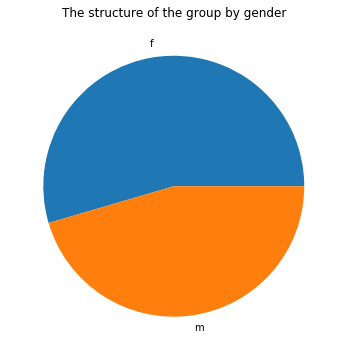

In [17]:
import matplotlib.pyplot as plt
freq = students_ix["Sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(freq.values, labels=freq.index)
plt.title("The structure of the group by gender")
plt.show()
plt.close()

Analogously, we can visualize the structure of the group by age:

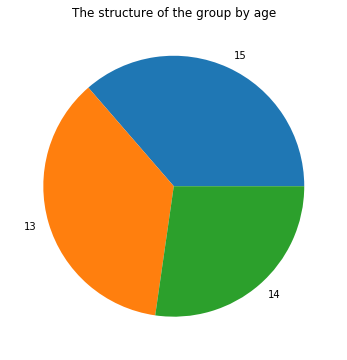

In [18]:
freq = students_ix["Age"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(freq.values, labels=freq.index)
plt.title("The structure of the group by age")
plt.show()
plt.close()

As a final example let us find the distribution of countries by continents. At the following URL

    https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv
    
you can find a publicly available list of all the countries in the world. Let us start by loading the list into a DataFrame:

In [19]:
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
countries.head(5)

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


The number of countries per continen can now be easily determined:

In [20]:
countries["Region"].value_counts()

AFRICA           54
EUROPE           47
ASIA             44
NORTH AMERICA    23
OCEANIA          14
SOUTH AMERICA    12
Name: Region, dtype: int64

and visualized:

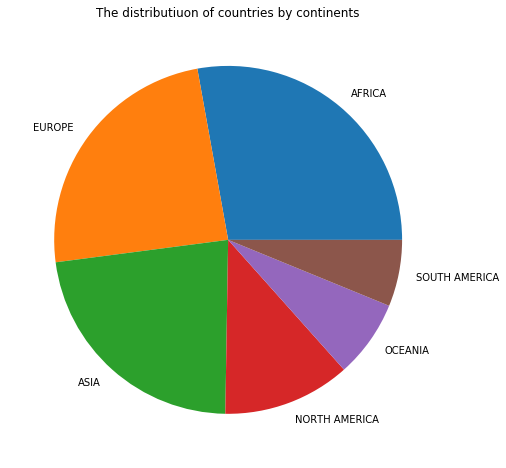

In [21]:
by_continents = countries["Region"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(by_continents.values, labels=by_continents.index)
plt.title("The distributiuon of countries by continents")
plt.show()
plt.close()

## 9.4. Exercises

**Exercise 1.** The file _data/LongestRiversOfEurope.csv_ contains the list of the tlongest 25 rivers of Europe. This table has five columns:

- River = name of the river,
- Length = length of the river in km,
- Countries = a string with all the countries the river flows through,
- Mouth = the sea/ocean/lake the river flows into, and
- Via = "(directly)" if the river flows directly into the sea/ocean/lake; otherwise the name of the river through which it flows into the sea/ocean/lake.

_(a)_ Load the file into a DataFrame, index it by the column "River" and display the first few lines of the table.

 
_(b)_ Sort the table by length so that the longest river in Europe is on the top.

_(c)_ How many of the longest 25 rivers of Europe flow through Russia, how many through Germany, and how many through Liechtenstein?

_(d)_ For a new table that consists only of those rivers that flow directly into a sea/ocean/lake, get rid of the row "Via" and write the table into the file _data/FLowDirectly.csv_

**Exercise 2.** Here are nutritive facts about some sea food:

| Product (100g) | Nutritive value (kcal) | Carbohydrates (g) | Proteins (g) | Fats (g) |
|--|--|--|--|--|
|Tuna|116|0|26|1|
|Hake|88|0|17.2|0.8|
|Trout|119|0|18|5|
|Salmon|116|0|20|3.5|
|Mackerel|205|0|19|14|
|Sardines|135|0|18|5|
|Hеrring|158|0|18|9|
|Cod|82|0|18|0.7|
|Catfish|95|0|16.4|2.8|
|Carp|127|0|17.6|5.6|
|Gilthead|115|0|16.5|5.5|
|Eel|184|0|18.4|11.7|
|Shrimp|106|1|20|2|
|Mussels|86|4|12|2|
|Prawns|71|1|13|1|
|Squid|92|3|15.6|1.3|
|Octopus|81|0|16.4|0.9|
|Lobster|112|0|20|1.5|

This table can be represented as a list like this:

In [22]:
sea_food = [
  ["Tuna", 116, 0, 26, 1],
  ["Hake", 88, 0, 17.2, 0.8],
  ["Trout", 119, 0, 18, 5],
  ["Salmon", 116, 0, 20, 3.5],
  ["Mackerel", 205, 0, 19, 14],
  ["Sardines", 135, 0, 18, 5],
  ["Hеrring", 158, 0, 18, 9],
  ["Cod", 82, 0, 18, 0.7],
  ["Catfish", 95, 0, 16.4, 2.8],
  ["Carp", 127, 0, 17.6, 5.6],
  ["Gilthead", 115, 0, 16.5, 5.5],
  ["Eel", 184, 0, 18.4, 11.7],
  ["Shrimp", 106, 1, 20, 2],
  ["Mussels", 86, 4, 12, 2],
  ["Prawns", 71, 1, 13, 1],
  ["Squid", 92, 3, 15.6, 1.3],
  ["Octopus", 81, 0, 16.4, 0.9],
  ["Lobster", 112, 0, 20, 1.5]]

_(a)_ Turn this list into a DataFrame, name the colums appropriately and index the table.

_(b)_ Sort the table by nutritive value and visualize the data using a bar chart.

_(c)_ Make the frequency analysis of this table according to the amount of carbohydrates and visualize you result by a pie chart.

_(d)_ Put all the sea food with no carbohydrates and less that 10 g of fats per 100 g into a new table.

**Exercise 3.** At a PE lecture the students were practising long jumps. Each student had three tries and the data is collected in _LongJump.csv_ available in the folder _data_. The first row of the file is the header.

_(a)_ Load this file into a _DataFrame_.

_(b)_ Add a new column "Max" to the table and for each student compute the best jump.

_(c)_ Sort the table by "Max" and display the first five rows of the sorted table.

_(d)_ SIngle out those students who have made at least one foul jump. Foul jumps are recorded as 0.

**Exercise 4.** The following list contains some basic information about a group of students: last name, first name, student ID, the class they attend and the average of their marks:

In [23]:
student = [
    ["Peterson",    "Peter",   "0308003800019", "m", 8, 4.52],
    ["Janesdottir", "Jane",    "1210003805026", "f", 8, 5.00],
    ["Annesdottir", "Anne",    "1105004805019", "f", 7, 4.11],
    ["Verasdottir", "Vera",    "2901005705011", "f", 6, 5.00],
    ["Georgsson",   "George",  "1504005700012", "m", 6, 3.12],
    ["Michaelson",  "Michael", "1506004400056", "m", 7, 2.51],
    ["Michaelson",  "Peter",   "1506004400057", "m", 7, 2.48],
    ["Smith",       "Nathan",  "2109003800046", "m", 8, 3.58],
    ["Smith",       "Jane",    "2109003805021", "f", 8, 4.21]
]

_(a)_ Turn this into a _DataFrame_.

_(b)_ Visualize the gender structure of the group by a pie chart.

_(c)_ Visualize the age structure of the group by a pie chart (base your analysis on the class the student attends).

_(d)_ Which column is the best choice for an index column?

_(e)_ Put all the students of the 8th grade into a new table.

_(f)_ Put all the boys whose average mark is less that 4.50 into a new table.

**Zadatak 6.** At the following URL:

    https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv

you can find a publicly available table with the list of all the countries in the world and some parameters of the economic development for each country. The table has the six columns:

* country
* year = the year in which the economic parameters were computed
* pop = population
* continent
* lifeExp = life expextancy
* gdpPercap = GDP per capitem

_(a)_ Load this table into a _DataFrame_.

_(b)_ Put all the data that refers to your country into a new table (use a filtering criterion like this: `table[table.country == "Serbia"]`) and write it to a file.

_(c)_ Display the change of the life expectancy of your country in time by a line chart.

_(d)_ Display the change in GDP in your country by a bar chart.